In [1]:
############# pands 사용 #####################################

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Pandas 표 ( 컬럼의 모음 )
# 편의점 매출표

# id   item_name    개수    단가    총액   포인트사용액    현금
# 1     새우탕       2      1500    3000      100          2900
# 2     메로나       1      1000    1000      500           500

# #개수만 보고싶어
# id   item_name    개수  
# 1     새우탕       2      
# 2     메로나       1     

# #총액이 얼마인가
# id   item_name    개수       총액   포인트사용액    현금
# 1     새우탕       2         3000      100          2900
# 2     메로나       1         1000      500           500


In [3]:
# 컬럼 표현 Series  (컬럼하나를 시리즈라고 한다.)
a=[10,20,30,40]
s1  = pd.Series(a)
s1

0    10
1    20
2    30
3    40
dtype: int64

In [4]:
type(a), type(s1), s1.dtype

(list, pandas.core.series.Series, dtype('int64'))

In [5]:
a=[10,20,30,40]
s2  = pd.Series(a, index = [1,2,3,4]) #인덱스도 1부터 시작하게
s2

1    10
2    20
3    30
4    40
dtype: int64

In [6]:
s2[3]

30

In [7]:
a=[10,20,30,40]
s3  = pd.Series(a, index = ["1","2","3","4"]) #인덱스도 1부터 시작하게
s3

1    10
2    20
3    30
4    40
dtype: int64

In [8]:
s3[3],  s3["3"]   # "" 가 들어간 index는 조심해서 살펴봐야해// 정답은 후자

(40, 30)

In [9]:
d2 = {1:10, 2:20, 3:30, 4:40}   #dictionary 형태로 index 없이 한번에 넣기
s4 = pd.Series(d2)
s4

1    10
2    20
3    30
4    40
dtype: int64

In [10]:
# 아래와 같이 부분만 발췌하고 싶을 때
# 1    10
# 3    30
# dtype: int64

In [11]:
s4[1],s4[3] #이거는 튜플로 결과값이 나오고

(10, 30)

In [12]:
s4[ [1,3] ]   #원하는 리스트 값을 집어 넣으니

1    10
3    30
dtype: int64

In [13]:
#딕셔너리 중괄호 {}
menu = pd.Series({"손님1":5, "손님2" : 3, "손님3":2, "손님4":1, "손님5": 4, "손님6": 5})

menu

손님1    5
손님2    3
손님3    2
손님4    1
손님5    4
손님6    5
dtype: int64

In [14]:
# 2, 5번 손님은 빼고 1,3,4,6  메뉴
menu[  ["손님1", "손님3", "손님4", "손님6"]   ]

손님1    5
손님3    2
손님4    1
손님6    5
dtype: int64

In [15]:
#파이썬 테크닉 : 슬라이싱 [1:] --> 1이후에 모든 
list_1 =["사과", "배", "포도"]
list_1 [1:]

['배', '포도']

In [16]:
#슬라이싱 사용하기
menu[3:]

손님4    1
손님5    4
손님6    5
dtype: int64

In [17]:
menu_긍정 = menu[menu >= 4]
menu_긍정

손님1    5
손님5    4
손님6    5
dtype: int64

In [18]:
menu_부정 = menu[menu < 3]
menu_부정

손님3    2
손님4    1
dtype: int64

In [19]:
#타입변경
메뉴1 = menu.astype("object")
메뉴1

손님1    5
손님2    3
손님3    2
손님4    1
손님5    4
손님6    5
dtype: object

In [20]:
메뉴1 = menu.astype("int")
메뉴1

손님1    5
손님2    3
손님3    2
손님4    1
손님5    4
손님6    5
dtype: int32

In [21]:
메뉴1.index  #인덱스값

Index(['손님1', '손님2', '손님3', '손님4', '손님5', '손님6'], dtype='object')

In [22]:
메뉴1.values #값

array([5, 3, 2, 1, 4, 5])

In [23]:
메뉴1.to_numpy()

array([5, 3, 2, 1, 4, 5])

In [24]:
메뉴2 = pd.Series([4,3,2,1,5,5],index = 메뉴1.index)
메뉴2

손님1    4
손님2    3
손님3    2
손님4    1
손님5    5
손님6    5
dtype: int64

In [25]:
# 시리즈 간의 연산
메뉴1 + 메뉴2

손님1     9
손님2     6
손님3     4
손님4     2
손님5     9
손님6    10
dtype: int64

In [26]:
# DB에서 가져온 데이터를 합치는데서 의미를 가진다.
#메뉴 1, 메뉴 2 칼럼
data = [[5,4],
        [3,3],
        [2,2],
        [1,1],
        [4,5],
        [5,5],
]
df = pd.DataFrame(data, index=메뉴1.index, columns=["메뉴1", "메뉴2"])
df

,메뉴1,메뉴2
손님1,5,4
손님2,3,3
손님3,2,2
손님4,1,1
손님5,4,5
손님6,5,5


In [27]:
#다른 방식
data = {"메뉴1":[5,3,2,1,4,5],
        "메뉴2":[4,3,2,1,5,5]}
df = pd.DataFrame(data, index= 메뉴1.index)
df

,메뉴1,메뉴2
손님1,5,4
손님2,3,3
손님3,2,2
손님4,1,1
손님5,4,5
손님6,5,5


In [28]:
#다른 방식2
data = {"메뉴1":pd.Series([5,3,2,1,4,5], index=메뉴1.index),
        "메뉴2":pd.Series([4,3,2,1,5,5], index=메뉴1.index)}
df = pd.DataFrame(data)
df

,메뉴1,메뉴2
손님1,5,4
손님2,3,3
손님3,2,2
손님4,1,1
손님5,4,5
손님6,5,5


In [29]:
# 메모장 만든후 csv 확장자로 만들어서
# 데이터를 복사해서 ,(쉼표) <-- 로 데이터 구분되게 만든다.

In [30]:
df = pd.read_csv("menus.csv", header=None, index_col =0)
df

,1,2
0,,
손님1,5,4
손님2,3,3
손님3,2,2
손님4,1,1
손님5,4,5
손님6,5,5


In [31]:
#컬럼설정
df.columns = ["메뉴1", "메뉴2"]
df

,메뉴1,메뉴2
0,,
손님1,5,4
손님2,3,3
손님3,2,2
손님4,1,1
손님5,4,5
손님6,5,5


In [32]:
# menus2 테이블 만들기

df2 = pd.read_csv("menus2.csv", header=None, index_col =0)
df2.columns = ["메뉴1", "메뉴2"]
df2

,메뉴1,메뉴2
0,,
손님1,5,4
손님2,3,3
손님3,2,2
손님4,1,1
손님5,4,5
손님6,5,5


In [33]:
#index와 col 이름을 바꾸고 싶을 때

df2.index = ["cus1", "cus2", "cus3","cus4","cus5","cus6"]
df2.columns = ["짜장면", "짬뽕"]
df2

,짜장면,짬뽕
cus1,5,4
cus2,3,3
cus3,2,2
cus4,1,1
cus5,4,5
cus6,5,5


In [34]:
#series만 추출
s1 = df2["짜장면"]
s1

cus1    5
cus2    3
cus3    2
cus4    1
cus5    4
cus6    5
Name: 짜장면, dtype: int64

In [35]:
#데이터 프레임상태로 추출
df2_menu1 = df2[["짜장면"]]
df2_menu1

,짜장면
cus1,5
cus2,3
cus3,2
cus4,1
cus5,4
cus6,5


In [36]:
# 새로운 컬럼 : 식사부  생성

df2["식사부"] = df2["짜장면"] + df2["짬뽕"]
df2

,짜장면,짬뽕,식사부
cus1,5,4,9
cus2,3,3,6
cus3,2,2,4
cus4,1,1,2
cus5,4,5,9
cus6,5,5,10


In [37]:
df2[["식사부"]]

,식사부
cus1,9
cus2,6
cus3,4
cus4,2
cus5,9
cus6,10


In [38]:
# 데이터 프레임에서 원하지 않는 것을 지우고 싶을 떄
del df2["식사부"]
df2

,짜장면,짬뽕
cus1,5,4
cus2,3,3
cus3,2,2
cus4,1,1
cus5,4,5
cus6,5,5


In [39]:
#rename (columns, index) 컬럼 이름 바꾸기 --> 딕셔너리로 바꾼다.
df2 = df2.rename(columns  = {"짜장면":"자장"})
df2 = df2.rename(index  = {"cus3":"손님3"})
df2

,자장,짬뽕
cus1,5,4
cus2,3,3
손님3,2,2
cus4,1,1
cus5,4,5
cus6,5,5


In [40]:
# 특정한 하나의 값에 접근하는 방법
df2.iloc[2,1]  # iloc  i --> 정수 형태로 접근 loc --> 그냥 나와있는 이름 그대로의 컬럼및 인덱스

2

In [41]:
# 특정한 하나의 값에 접근하는 방법 - 값바꾸기
df2.iloc[2,1] = 40 
df2

,자장,짬뽕
cus1,5,4
cus2,3,3
손님3,2,40
cus4,1,1
cus5,4,5
cus6,5,5


In [42]:
# transpose   전치
df2.T

,cus1,cus2,손님3,cus4,cus5,cus6
자장,5,3,2,1,4,5
짬뽕,4,3,40,1,5,5


In [43]:
# 같은 표현
df_T = df2.transpose()
df_T

,cus1,cus2,손님3,cus4,cus5,cus6
자장,5,3,2,1,4,5
짬뽕,4,3,40,1,5,5


In [44]:
df_T.iloc[1,2]

40

In [46]:
#####################################################################

In [45]:
data =[
["해찬","고기덮밥"],
["명서","국수"],
["건희","완당"],
["원영","국밥"],
["문규","돈까스"],
["진우","낙지"]]
col = ["이름", "희망메뉴"]
index = ["학생1","학생2","학생3","학생4","학생5","학생6"]

In [46]:
lunch = pd.DataFrame(data,columns=col, index = index)
lunch

,이름,희망메뉴
학생1,해찬,고기덮밥
학생2,명서,국수
학생3,건희,완당
학생4,원영,국밥
학생5,문규,돈까스
학생6,진우,낙지


In [47]:
lunch2 = lunch.set_index(["이름"])
lunch2

,희망메뉴
이름,
해찬,고기덮밥
명서,국수
건희,완당
원영,국밥
문규,돈까스
진우,낙지


In [48]:
lunch2.loc["진우"]

희망메뉴    낙지
Name: 진우, dtype: object

In [49]:
#컬럼에 있는 내용을 index에 추가 하고 싶을 때
lunch2["이름"] = lunch2.index
lunch2

,희망메뉴,이름
이름,,
해찬,고기덮밥,해찬
명서,국수,명서
건희,완당,건희
원영,국밥,원영
문규,돈까스,문규
진우,낙지,진우


In [50]:
lunch2["가격"] = [10000, 8000, 12000, 9000, 11000, 12000]
lunch2

,희망메뉴,이름,가격
이름,,,
해찬,고기덮밥,해찬,10000
명서,국수,명서,8000
건희,완당,건희,12000
원영,국밥,원영,9000
문규,돈까스,문규,11000
진우,낙지,진우,12000


In [51]:
#데이터프레임 정렬
lunch2.sort_values(by="가격",ascending = False)

,희망메뉴,이름,가격
이름,,,
건희,완당,건희,12000
진우,낙지,진우,12000
문규,돈까스,문규,11000
해찬,고기덮밥,해찬,10000
원영,국밥,원영,9000
명서,국수,명서,8000


In [52]:
#엑셀로 보내기 sheet이름은
lunch2.to_excel("lunch2.xlsx", sheet_name = "MySheet1")

In [53]:
#카피해서 만들기
lunch3 = lunch2.copy()
lunch3 = lunch3[["희망메뉴"]]
lunch3

,희망메뉴
이름,
해찬,고기덮밥
명서,국수
건희,완당
원영,국밥
문규,돈까스
진우,낙지


In [54]:
#각각 시트에 이름지정하여 들어가게 하기
writer = pd.ExcelWriter("lunch3.xlsx")
lunch2.to_excel(writer,sheet_name="lunch2")
lunch3.to_excel(writer,sheet_name="lunch3")
writer._save()
writer.close()

In [ ]:
#####################################################################################################################

In [55]:
#누락되는 데이터는 NaN으로 표기 
# NaN :Not A Numer, Na, np.nan, None, Null
data=[{"버스":1000, "지하철":1000},
      {"버스":1500, "지하철":2500, "택시":3500}]
idx = ["학생A", "학생B"]
df = pd.DataFrame(data, index = idx)
df

,버스,지하철,택시
학생A,1000,1000,NaN
학생B,1500,2500,3500.0


In [56]:
#데이터는 비어있으면 안돼!!!!!!   NaN을 지운다 --> 컬럼과 행을 왜 지웠는지 설명할 수 있어야한다.

#NaN  --> 방법1 : 불완전한 행을 없어지게 해야한다
df.dropna()

,버스,지하철,택시
학생B,1500,2500,3500.0


In [57]:
# 방법2 : 특정 컬럼을 없앤다.
df.dropna(axis=1)


,버스,지하철
학생A,1000,1000
학생B,1500,2500


In [58]:
#방법 3: 빈칸을 채우기
df = df.fillna(3500)
df

,버스,지하철,택시
학생A,1000,1000,3500.0
학생B,1500,2500,3500.0


In [61]:
# 방법 3 : 빈값을 평균값으로 채우기
df.iloc[0,2] = np.nan
df = df.fillna(df.mean())
df   

,버스,지하철,택시
학생A,1000,1000,3500.0
학생B,1500,2500,3500.0


<Axes: >

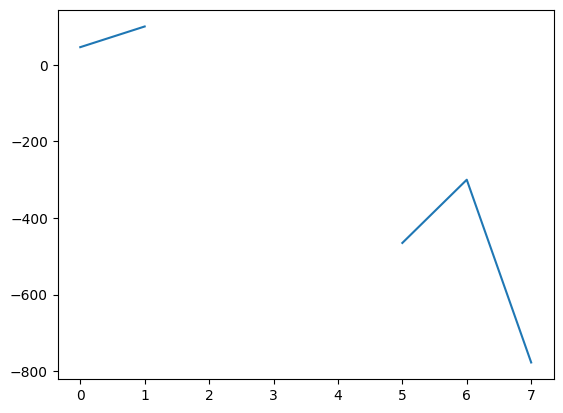

In [64]:
# 방법 3:  평균값을 넣는 이유 :  plot에 빈칸이 생겼을 때 그래프를 채워주기 위해서
s= pd.Series([46, 100, np.nan, np.nan, np.nan,
              -465, -300, -777])
s.plot()

<Axes: >

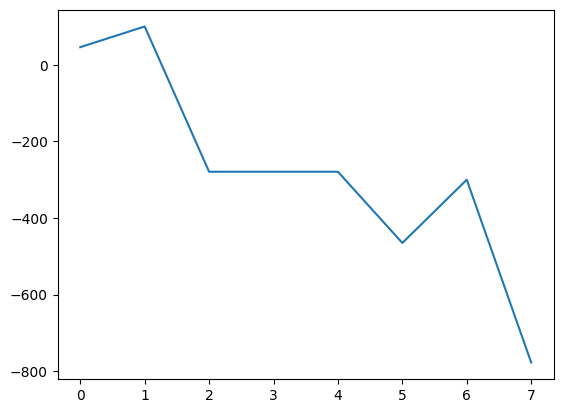

In [66]:
# 방법 3:  평균값을 넣었지만 --> 그래프가 오히려 이상하게 나온다. --> 일자로 연결하자 
s1 = s.fillna(s.mean())
s1
s1.plot()

<Axes: >

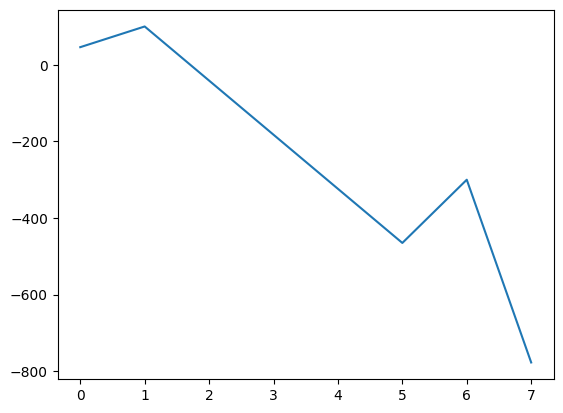

In [67]:
#interpolation을 사용하여 그래프 채워주기
s2= s.interpolate()
s2.plot()